ANA CAROLINA DELENA CURY
 - Collaborator 1
 - Collaborator 2
 - etc

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 2 - Classification

Due Friday Mar 28, 2025 4p

Total pts: 30

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - *Do not rewrite code* if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

In this problem, you'll be comparing Logistic Regression, Decision Trees, and Random Forests in a task identifying mushrooms as edible or poisonous.
The data is imported below and the features and feature values are listed. Notice, they're all letters.

 - Split the data into targets and features
 - Decide which features are ordinal or categorical. Refer to the feature descriptions on the [UCI Machine Learning site](https://archive.ics.uci.edu/dataset/73/mushroom) (hint: at least 3 categories are ordinal and others are binary...so you'll use an ordinal encoder)
 - Encode the features
 - Train the three models. You will want to use ```LogisticRegressionCV``` and ```GridSearchCV``` to find the best version of each model.
 - Make predictions with your models.
 - Show the confusion matrices for each type of model evaluated on the same test set. Label each figure clearly as to which model it is.

In [ ]:
import pandas as pd

mushrooms_df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/mushrooms.csv')

for k, col in enumerate(mushrooms_df.columns):
    print(f'{k:>3}. {col} - {mushrooms_df[col].unique()}')

  0. type - ['p' 'e']
  1. cap_shape - ['x' 'b' 's' 'f' 'k' 'c']
  2. cap_surface - ['s' 'y' 'f' 'g']
  3. cap_color - ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
  4. bruises - ['t' 'f']
  5. odor - ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
  6. gill_attachment - ['f' 'a']
  7. gill_spacing - ['c' 'w']
  8. gill_size - ['n' 'b']
  9. gill_color - ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
 10. stalk_shape - ['e' 't']
 11. stalk_root - ['e' 'c' 'b' 'r' '?']
 12. stalk_surface_above_ring - ['s' 'f' 'k' 'y']
 13. stalk_surface_below_ring - ['s' 'f' 'y' 'k']
 14. stalk_color_above_ring - ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
 15. stalk_color_below_ring - ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
 16. veil_type - ['p']
 17. veil_color - ['w' 'n' 'o' 'y']
 18. ring_number - ['o' 't' 'n']
 19. ring_type - ['p' 'e' 'l' 'f' 'n']
 20. spore_print_color - ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
 21. population - ['s' 'n' 'a' 'v' 'y' 'c']
 22. habitat - ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [5]:
mushroom_features = mushrooms_df.drop('type', axis=1)
mushroom_target = mushrooms_df['type']

In [13]:
y = mushrooms_df['type']       
X = mushrooms_df.drop(columns = 'type')         
                 
all_features = list(X.columns)

ord_features = [ 'gill_attachment',
                'gill_spacing',
                'gill_size', 
                'stalk_shape', 
                'bruises',
                'ring_number', 
                'population']

cat_features = [col for col in all_features if col not in ord_features]

In [17]:
from sklearn.preprocessing import OrdinalEncoder

# Encode ordinal features
ord_encoder = OrdinalEncoder()
X[ord_features] = ord_encoder.fit_transform(X[ord_features])

In [18]:
X = pd.get_dummies(X, columns=cat_features, drop_first=True)

In [19]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegressionCV

# Train logistic regression with cross-validation
logreg_cv = LogisticRegressionCV(cv=5, max_iter=1000, random_state=42)
logreg_cv.fit(X_train, y_train)

# Evaluate the model
print("Best C parameter:", logreg_cv.C_)
print("Training accuracy:", logreg_cv.score(X_train, y_train))
print("Test accuracy:", logreg_cv.score(X_test, y_test))

Best C parameter: [2.7825594]
Training accuracy: 1.0
Test accuracy: 1.0


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid_tree = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search
tree_model = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_tree, cv=5)
tree_model.fit(X_train, y_train)

# Evaluate the model
print("Best parameters:", tree_model.best_params_)
print("Training accuracy:", tree_model.score(X_train, y_train))
print("Test accuracy:", tree_model.score(X_test, y_test))

Best parameters: {'max_depth': 10, 'min_samples_split': 2}
Training accuracy: 1.0
Test accuracy: 1.0


In [22]:
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameter grid
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5]
}

# Perform grid search
rf_model = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
rf_model.fit(X_train, y_train)

# Evaluate the model
print("Best parameters:", rf_model.best_params_)
print("Training accuracy:", rf_model.score(X_train, y_train))
print("Test accuracy:", rf_model.score(X_test, y_test))


Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Training accuracy: 1.0
Test accuracy: 1.0


In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# List of models to evaluate
models = {
    "Logistic Regression": logreg_cv,
    "Decision Tree": tree_model.best_estimator_,
    "Random Forest": rf_model.best_estimator_
}

In [34]:
def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.spring)
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()

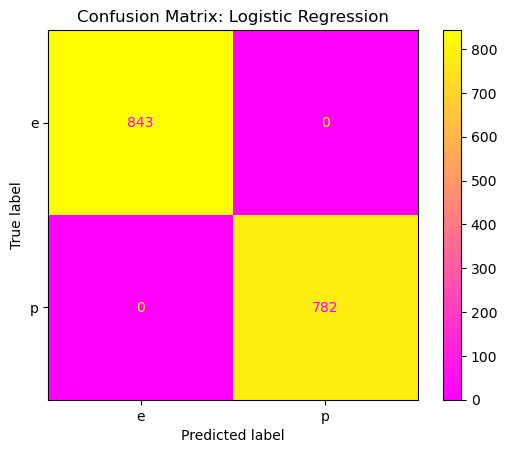

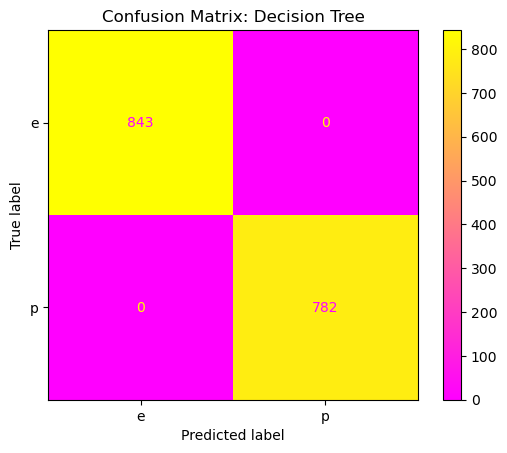

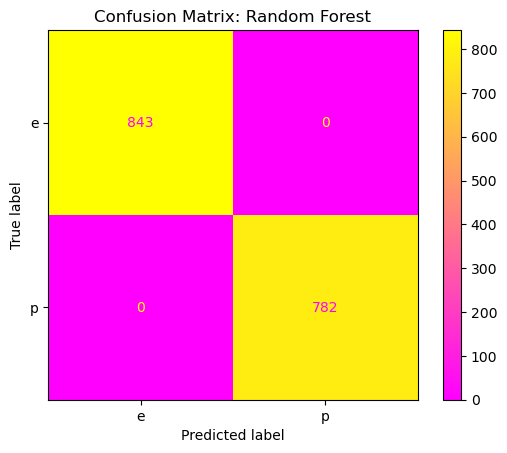

In [35]:
for model_name, model in models.items():
    plot_confusion_matrix(model, X_test, y_test, model_name)

In [38]:

#this are the ordinal ecoder, the rest is categorical
#- gill_spacing
#- gill_attachment
#- gill_size
#- stalk_shape
#- bruises 
#- ring_number 
#- population 
#- veil type 

### Problem 1 questions

 - Which model was best?
 - What were the hyper-parameters of this model.
 - What were the accuracy, recall, and precision of the model.
 - Of accuracy, recall, precision, which did you use to decide the best model.

In [39]:
print("Best parameters for Decision Tree:", tree_model.best_params_)

Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 2}


In [40]:
print("Best parameters for Random Forest:", rf_model.best_params_)


Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


#### Your responses here:

- Which model: 

- Hyper-parameters: Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 2}, Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}

- Metrics for Logistic Regression, Decision Tree and Random Forest
    - Accuracy: 1
    - Recall: 1
    - Precision: 1 
- How did you decide best? All of them performed the same.

## Problem 2

The NFL draft is coming up at the end of April. This is when NFL teams get to select college players to join their team. The draft comprises seven rounds over three days (day 1: round 1, day 2: rounds 2 and 3, day 3: rounds 4, 5, 6, 7) with teams taking turns selecting players. Better players tend to go in earlier rounds.

In this problem, you will try to predict whether defensive players are drafted on Day 1, 2, or 3 based on their performance in the NFL combine (an assay of physical skills).

The data are imported below.

 - Create a target variable for day 1, day 2, day 3 based on the round drafted.
 - Create the most accurate predictor you can using any method or subset of the data you choose. *You may not use round as a feature!*
 - Show the confusion matrix for your model and list the accuracy of your model.

In [3]:
nfl_draft = pd.read_csv('https://raw.githubusercontent.com/eatai/datasets/refs/heads/main/nfl_defensive_draft.csv')

In [4]:
nfl_draft.head()

,Unnamed: 0,round,season,name,age,position,college_conference,height,weight,forty,vertical,broad_jump,cone,shuttle
0,0,1,2003,Dewayne Robertson,21.0,DL,NaN,6.083333,317.0,5.15,NaN,NaN,NaN,NaN
1,1,1,2003,Terence Newman,25.0,DB,Big Twelve Conference,5.833333,189.0,4.37,41.0,136.0,6.88,3.83
2,2,1,2003,Johnathan Sullivan,22.0,DL,NaN,6.250000,313.0,5.10,NaN,NaN,NaN,NaN
3,3,1,2003,Kevin Williams,23.0,DL,NaN,6.416667,304.0,4.81,30.0,112.0,7.66,5.04
4,4,1,2003,Terrell Suggs,20.0,LB,Pacific Ten Conference,6.250000,262.0,4.84,NaN,NaN,NaN,NaN


In [78]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [42]:
# Create the target variable 'draft_day'
nfl_draft['draft_day'] = nfl_draft['round'].apply(
    lambda x: 1 if x == 1 else (2 if x in [2, 3] else 3)
)

# Verify the mapping
print(nfl_draft[['round', 'draft_day']].head())

   round  draft_day
0      1          1
1      1          1
2      1          1
3      1          1
4      1          1


In [68]:
drop_cols = ['round', 'player', 'college', 'team']  # Drop non-numeric and identifier columns
nfl_draft = nfl_draft.drop(columns=[col for col in drop_cols if col in nfl_draft.columns])


In [75]:
X = nfl_draft.drop(columns=["draft_day"])  # Features
y = nfl_draft["draft_day"]  # Target

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [83]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [84]:
y_pred = rf_model.predict(X_test)

In [85]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [86]:
print(f"Model Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Model Accuracy: 0.5835
Confusion Matrix:
[[ 14  25  31]
 [ 13  55  89]
 [  4  30 200]]


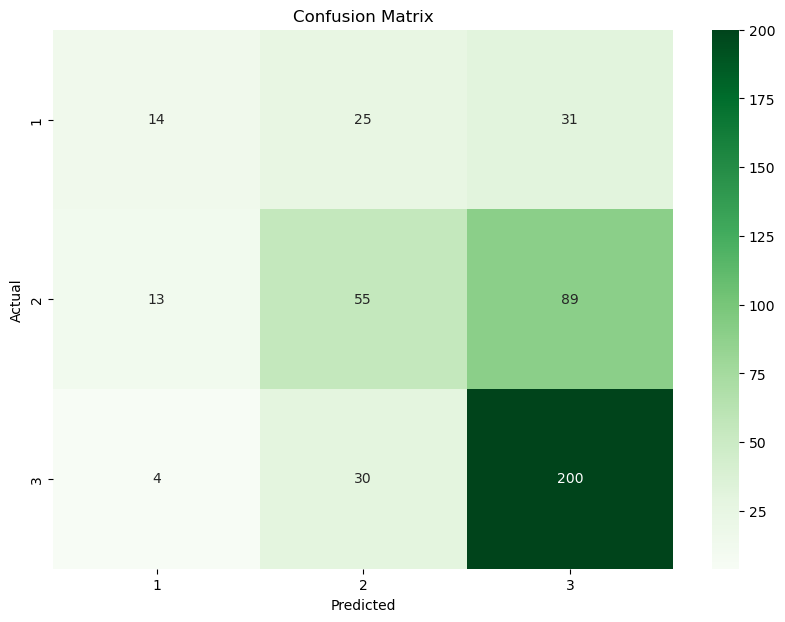

Model Accuracy: 0.5835


In [88]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

In [70]:
print(X_train.isnull().sum())  # Check for missing values
print(X_train.dtypes)  

0                                                 0
1                                                 0
2                                                 0
3                                                 0
4                                                 0
                                                 ..
college_conference_Southeastern Conference        0
college_conference_Southern Conference            0
college_conference_Southland Conference           0
college_conference_Sun Belt Conference            0
college_conference_Western Athletic Conference    0
Length: 2326, dtype: int64
0                                                 float64
1                                                 float64
2                                                 float64
3                                                 float64
4                                                 float64
                                                   ...   
college_conference_Southeastern Conference           

### Problem 2 Questions

 - Which kind of model did you use and why did you choose it? Random Forest, I used it to achieve higher accuracy. 
 - What was your accuracy? 0.5835 